# Density Function Theory para el atomo de Helio

Nicolas Unger

In [36]:
import numpy as np
import matplotlib.pyplot as plt

Hay que resolver la ecuacion de schrödinger radial:

\begin{equation}
\left[-\frac{1}{2}\nabla^2 - \frac{1}{r}\right]u(r) = Eu(r)
\end{equation}


## Diagonalizo

In [37]:
from numpy import identity 

def Laplacian(x):
    h = x[1]-x[0] # assume uniformly spaced points
    n = len(x)
    M = -2*identity(n,'d')
    for i in range(1,n):
        M[i,i-1] = M[i-1,i] = 1
    return M/h**2

In [38]:
from numpy import sqrt

# Normalización de las funciones 

def Normalizate(U,x):
    
    h = x[1]-x[0] # assume uniformly spaced points
    n = len(x)

        
    for j in range(0,n):
        suma = 0.0
        for i in range(1,n):
             suma = suma + U[i,j]**2

        suma = suma*h
        rnorm = 1/sqrt(suma)
#        print j,' integral (sin normalizar) =',rnorm
       
#       Normalization
        rsign = 1
        if U[1,j] < 0:
            rsign = -1
            
        rnorm = rnorm * rsign
        for i in range(0,n):
            U[i,j] = U[i,j]*rnorm
         
    return  U

In [68]:
from numpy import diag,  linspace, array, arange, zeros
from numpy.linalg import eigh
from matplotlib.pyplot import axhline, xlabel, ylabel, plot, axis, \
                                figure, title, show

step = 0.01
xmin = step
xmax = 20
x = arange(xmin,xmax,step)
nsize = len(x)
 
# array defined above
nsize = len(x)
Dx = step

x = linspace(xmin,xmax,nsize)
T = array([nsize,nsize])
V = array([nsize,nsize])
H = array([nsize,nsize])
E = array([nsize])

# Kinetic (T) and Potential (V)
lq = 0
zq = 2

T = -0.5*Laplacian(x)
V = -zq/x + lq*(lq+1)/(2 * x * x)

# Hamiltonian
H = T + diag(V)

# Eigenvalues (E) and Eigenvectors (U)
E,D = eigh(H)


# Normalization
D = Normalizate(D,x)

E1 = -1.99987832663
E2 = -0.499997300759
E3 = -0.222217426898
E4 = -0.12222156172
E5 = -0.044335018618


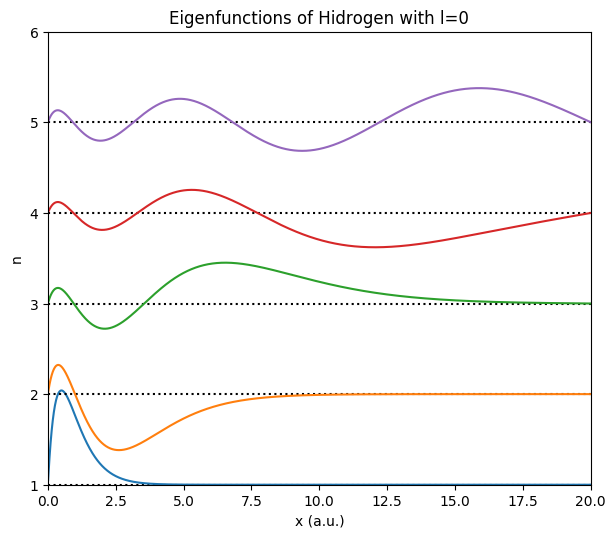

In [69]:
# Plot

#define plot size in inches (width, height) & resolution(DPI)
fig = figure(figsize=(7, 6), dpi=100)

# Number of functions to plot
nfunctions = 5

# Plot the potential
plot(x,V,color='k')

# Plot wavefunctions
ebase=0
for i in range(nfunctions):
    ebase=ebase+1
    # For each of the first few solutions, plot the energy level:
    axhline(y=ebase,color='k',ls=":")
    # as well as the eigenfunction, displaced the function 
    # so they don't all pile up on each other:
    plot(x,D[:,i]+ebase)
    print("E{} = {}".format(i+1,E[i]))
axis([xmin,xmax,1,6])
title("Eigenfunctions of Hidrogen with l={}".format(lq))
xlabel("x (a.u.)")
ylabel("n")
show()

## Resuelvo la integral de Hartree con la ecuacion de Poisson

\begin{equation}
U''(r) = -\frac{u^2(r)}{r}
\end{equation}

Siendo u(r) las soluciones de la diagonalizacion

In [41]:
def FZA(x,u):
    fza = -u**2/x
    return fza

# Funcion de prueba para ver si mi algoritmo funciona bien (La que propone el Thijssen)
def test(x):
    fza = -4*x*np.exp(-2*x)
    return fza

### Hago una resolucion de prueba para ver si el algoritmo anda bien

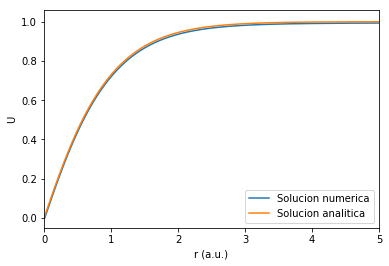

In [97]:
posp = np.zeros((nsize))

# Inicializo los primeros dos valores de la solucion numerica
posp[0] = 0
posp[1] = step

# Realizo la iteracoin por diferencias finitas
for i in range(2,nsize):
    posp[i] = test(x[i-1])*step**2 + 2*posp[i-1] - posp[i-2]
    
# Genero la solucion analitica para comparar
solucion = np.zeros((nsize))
for i in range(nsize):
    solucion[i] = -(x[i]+1)*np.exp(-2*x[i]) + 1

plt.plot(x,posp,label="Solucion numerica")
plt.plot(x,solucion,label="Solucion analitica")
plt.xlim((0,5))
#plt.ylim((-1,1))
plt.xlabel("r (a.u.)")
plt.ylabel("U")
plt.legend()
plt.show()
    

### Prueba de corregir la solucion de U agregandole la solucion homogenea tal que $U(r_{max}) = q_{max}$

Uso la funcion de onda radial del fundamental que sale de calcular schrödinger con z=2

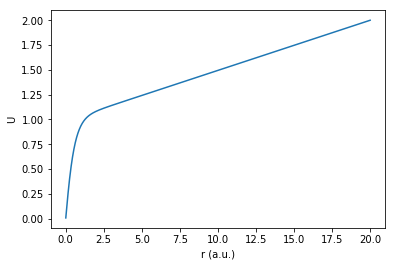

In [98]:
posp = np.zeros((nsize))

# Inicializo los primeros dos valores de la solucion numerica
posp[0] = 0
posp[1] = step

# Realizo la iteracoin por diferencias finitas
for i in range(2,nsize):
    posp[i] = FZA(x[i-1],D[i-1,0])*step**2 + 2*posp[i-1] - posp[i-2]

alpha = (zq - posp[-1]) / x[-1] 

posp = posp + alpha*x

plt.plot(x,posp)
plt.xlabel("r (a.u.)")
plt.ylabel("U")
plt.show()

## Resuelvo para el fundamental del helio

In [93]:
niter = 10

energias = []

Hartree = np.zeros((nsize)) # Potencial de Hartree
U = np.zeros((nsize)) # U = x*Hartree

# Realizo la interacion de DFT
for j in range(niter):
   
    # Redefino el potencial agregandole el potencial de Hartree
    V = -zq/x + Hartree
    
    # Hamiltoniano
    H = T + diag(V)

    # Eigenvalues (E) and Eigenvectors (D)
    E,D = eigh(H)

    # Normalization
    D = Normalizate(D,x)
    
    # Calculo el potencial de Hartree
    # Fijo los primeros dos valores de la solucion
    U[0] = 0
    U[1] = step
    
    # Resuelvo la ecuacion diferencial
    for i in range(2,nsize):
        U[i] = FZA(x[i-1],D[i-1,0])*step**2 + 2*U[i-1] - U[i-2]
    
    # Le sumo la solucion homogena tal que U(r_max) = q_max = 2
    alpha = (2 - U[-1]) / x[-1] 
    U = U + alpha*x

    Hartree = U / x
    
    # Calculo la energia total con la correccion de Hartree
    E_tot = 2*E[0] - np.trapz(Hartree*D[:,0]**2,x)
    
    # Voy guardando las energias que me da en cada iteracion
    energias.append(E_tot)
    
energias
    

[-5.2790715259512666,
 -2.5793064297647978,
 -2.9096125207883485,
 -2.8060944498631253,
 -2.8355137344262111,
 -2.8268872728452301,
 -2.8293944909907252,
 -2.8286638919994758,
 -2.8288766267117813,
 -2.828814669317981]

In [91]:
# Autovalor de la ecuacion de Schrödinger
E[0]

-0.86870161678919944

In [92]:
# Correccion de Hartree
np.trapz(Hartree*D[:,0]**2,x)

1.0749983437033193

### Lo mismo pero agregando la correccion de Local Density Aproximation

In [104]:
niter = 10

energias = []

Hartree = np.zeros((nsize)) # Potencial de Hartree
U = np.zeros((nsize)) # U = x*Hartree
Vx = np.zeros((nsize)) # Densitiy Exchange Potential

# Realizo la interacion de DFT
for j in range(niter):
    
    # Redefino el potencial agregandole el potencial de Hartree y el de Exchange
    V = -zq/x + 2*Hartree + Vx
    
    # Hamiltoniano
    H = T + diag(V)

    # Eigenvalues (E) and Eigenvectors (D)
    E,D = eigh(H)

    # Normalization
    D = Normalizate(D,x)
    
    # Calculo el potencial de Hartree
    # Fijo los primeros dos valores de la solucion
    U[0] = 0
    U[1] = step
    
    # Resuelvo la ecuacion diferencial
    for i in range(2,nsize):
        U[i] = FZA(x[i-1],D[i-1,0])*step**2 + 2*U[i-1] - U[i-2]
    
    # Le sumo la solucion homogena tal que U(r_max) = q_max = 2
    alpha = (2 - U[-1]) / x[-1] 
    U = U + alpha*x

    Hartree = U / x
    
    # Calculo el potencial de exchange
    Vx = -(3./2.)*(D[:,0]**2 / (np.pi**2 * x**2))**(1./3.)
    
    # Calculo la energia total con la correccion de Hartree
    E_tot = 2*E[0] - np.trapz(Hartree*D[:,0]**2,x) + 0.5*np.trapz(D[:,0]**2*Vx,x)
    
    # Voy guardando las energias que me da en cada iteracion
    energias.append(E_tot)
    
energias

[-5.7473675960758612,
 -2.2679766333011591,
 -2.7669104197300207,
 -2.5959600697891863,
 -2.652029126107363,
 -2.6331976024460526,
 -2.6394739446214817,
 -2.637376579146272,
 -2.6380768415867801,
 -2.6378429712989138]

In [105]:
# Autovalor de la ecuacion de Schrödinger
E[0]

-0.5735124750272369

In [106]:
# Correccion de Hartree
np.trapz(Hartree*D[:,0]**2,x)

1.0917064341906724

In [107]:
# Correccion de Exchange
0.5*np.trapz(D[:,0]**2*Vx,x)

-0.39911158705376726